<a href="https://colab.research.google.com/github/hossam2000ayman/Attack-On-Titan-Game/blob/main/K_means_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import sklearn as sklearn
import  numpy as np
import  matplotlib as plt
import seaborn as sns

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LoT7gknQ4akLrsQcPMd-9RrKDjCDkr2M' -O Live_20210128.csv

--2023-05-20 21:17:02--  https://docs.google.com/uc?export=download&id=1LoT7gknQ4akLrsQcPMd-9RrKDjCDkr2M
Resolving docs.google.com (docs.google.com)... 142.251.171.139, 142.251.171.113, 142.251.171.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.171.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gf1he10rriiauh65mhks2gm02vu9ojfh/1684617375000/04370868882784584118/*/1LoT7gknQ4akLrsQcPMd-9RrKDjCDkr2M?e=download&uuid=1ca7d616-fa5f-4d47-9307-80415664a839 [following]
--2023-05-20 21:17:02--  https://doc-08-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gf1he10rriiauh65mhks2gm02vu9ojfh/1684617375000/04370868882784584118/*/1LoT7gknQ4akLrsQcPMd-9RrKDjCDkr2M?e=download&uuid=1ca7d616-fa5f-4d47-9307-80415664a839
Resolving doc-08-9k-docs.googleusercontent.com (doc-08-9k-docs.googleusercontent.com)... 173.194.195.132, 2607:

# importing the dataset

In [3]:

data = pd.read_csv("Live_20210128.csv")

# shape of the dataset

In [4]:

print(data.shape)

(7050, 16)


# previewing the dataset

In [5]:

data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# printing the missing values

In [6]:

print(data.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


# droping the columns with missing values

In [7]:

data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

# checking null values
print(data.isnull().sum())

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


**Dataset meta data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


**Exploring Status_id column**

In [9]:
# labels in the variable
unique_data = data['status_id'].unique()

# printing total uniques values
print (len(unique_data))

7050


**Dropping status_id column**
droping the status id variable from data set

In [10]:

data.drop(['status_id'], axis=1, inplace=True)

**Exploring status_published column**

In [11]:
# labels in the variable
unique_data = data['status_published'].unique()

# printing total uniques values
print (len(unique_data))

6913


Dropping status_published column

In [12]:

data.drop(['status_published'], axis=1, inplace=True)

**Exploring status_type column**

In [13]:

unique_data = data['status_type'].unique()

# printing total uniques values
print (len(unique_data))

4


Dataset metadata

info about data set

In [14]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


Exploring Data correlation
ploting the pairplot graph

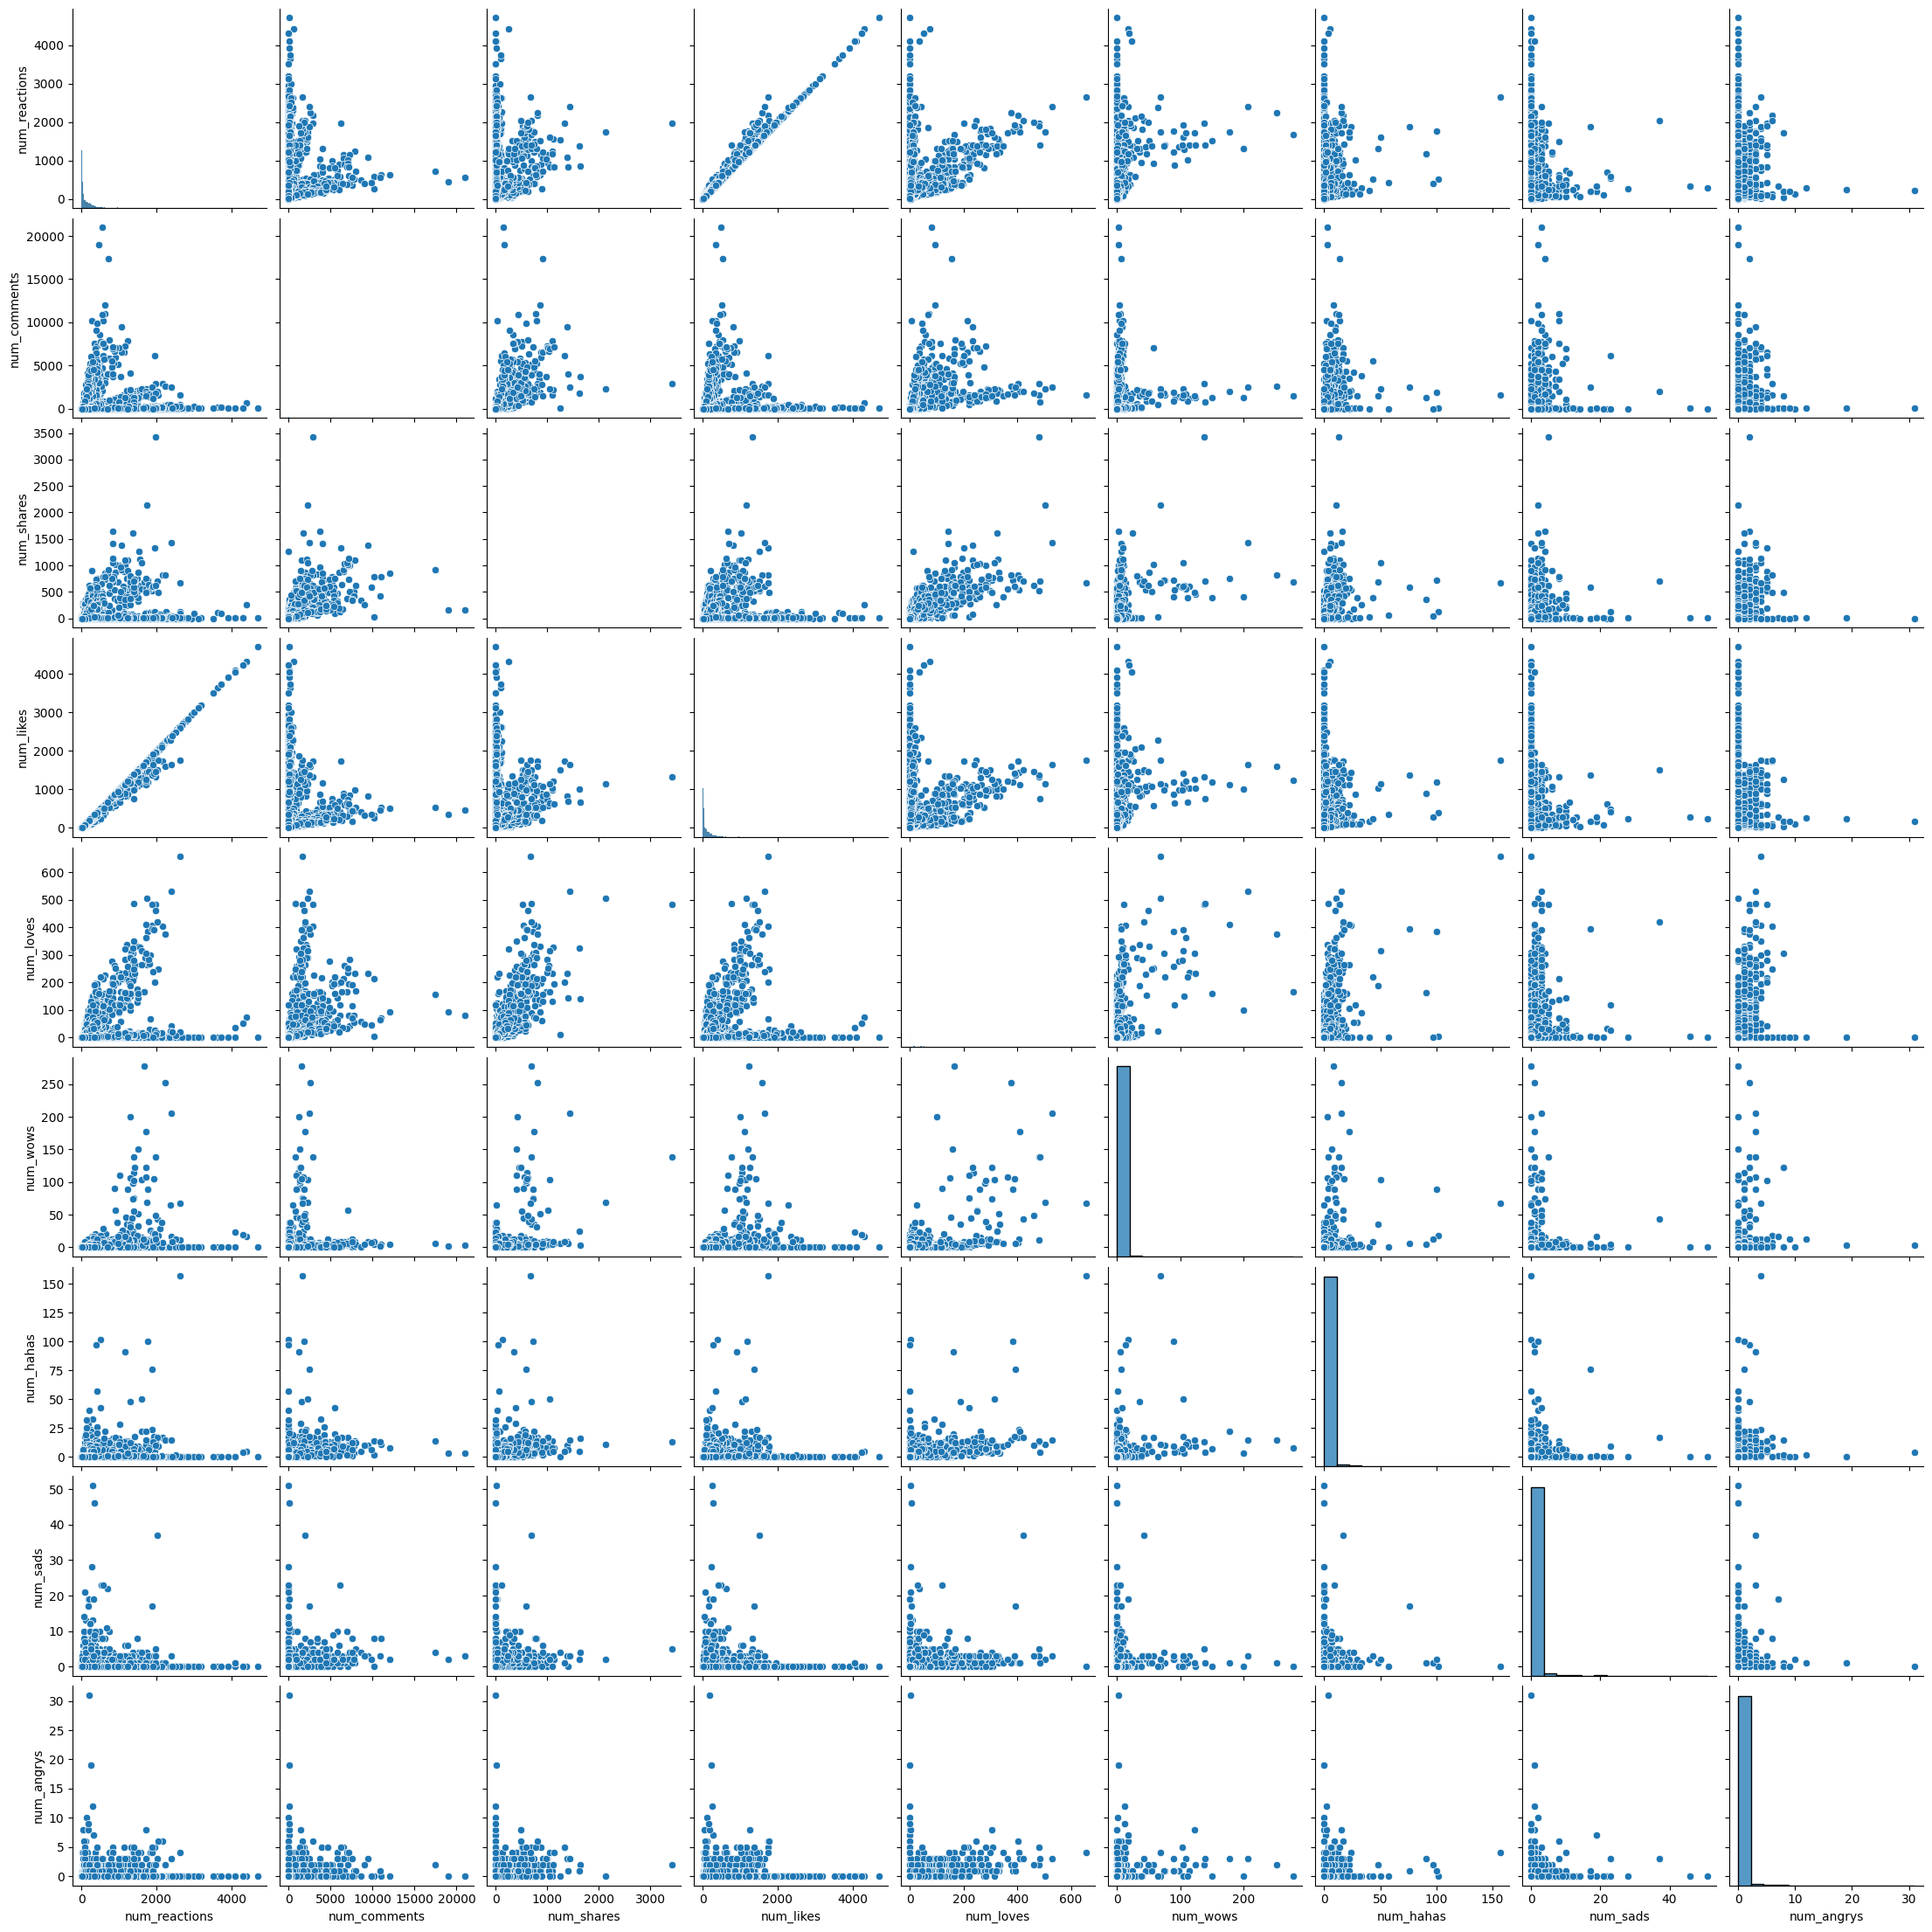

In [15]:

sns.pairplot(data)

Label encoding

In [16]:
# feature vector
X = data

# target variable
y = data['status_type']

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

Previewing dataset

In [17]:

X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**K-means Algorithm with k=2**

In [18]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[1.67882472e+00, 2.24142278e+02, 1.22109857e+02, 3.08061948e+01,
        2.11227529e+02, 1.09083804e+01, 1.15298886e+00, 5.56809958e-01,
        1.97423650e-01, 9.63960052e-02],
       [2.98581560e+00, 5.22886525e+02, 5.23441844e+03, 4.91624113e+02,
        4.02007092e+02, 1.01921986e+02, 7.97163121e+00, 7.53900709e+00,
        2.51063830e+00, 9.36170213e-01]])

**Getting inertia value**


In [19]:
# printing the value of inertia
print (kmeans.inertia_)

4986397875.914598


Checking classificaton performance

In [20]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 64 out of 7050 samples were correctly labeled.


K-means with k=3

In [21]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 3
kmeans = KMeans(n_clusters=3, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2735263885.7707624


**Checking classification performance**

In [22]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4077 out of 7050 samples were correctly labeled.


**Accuracy**

In [23]:
acc=(correct_labels/y.size)*100
print(acc)

57.82978723404255


**PCA**

**Import libraries**

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [25]:
X = data.drop('status_type', 1)
y = data['status_type']

<ipython-input-25-05edf876dbb0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('status_type', 1)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. Execute the following line of code to find the "explained variance ratio".

In [29]:
explained_variance = pca.explained_variance_ratio_


**Combining K-means with PCA**

In [30]:
# importing k-mean
from sklearn.cluster import KMeans
# k value assigned to 2
kmeans = KMeans(n_clusters=2, random_state=0) 
# fitting the values
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [31]:
# Cluster centers
kmeans.cluster_centers_

array([[ 7.82616456e+00, -1.66987017e+00,  6.55175543e-01,
         9.54296837e-02, -3.47491433e-01, -7.72351559e-02,
         1.78223291e-01,  1.05217442e-02, -1.00740674e-05],
       [-2.62449719e-01,  5.59989448e-02, -2.19712524e-02,
        -3.20022579e-03,  1.16530937e-02,  2.59007395e-03,
        -5.97670189e-03, -3.52845737e-04,  3.37832935e-07]])

In [32]:
print (kmeans.inertia_)

38535.27533402922


In [33]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_train == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_train.size))
print(correct_labels/y_train.size)

Result: 3431 out of 5640 samples were correctly labeled.
0.6083333333333333
